# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [3]:
# mostrar información del DataFrame
print()
print("ORDERS:")
print()
orders.info()
orders.head(51)


ORDERS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [4]:
# mostrar información del DataFrame
print()
print("PRODUCTS:")
print()
products.info(show_counts=True)
products.head(15)


PRODUCTS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [5]:
# mostrar información del DataFrame
print()
print("ORDER_PRODUCTS:")
print()
order_products.info(show_counts=True)
order_products.head(10)


ORDER_PRODUCTS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [6]:
# mostrar información del DataFrame
print()
print("AISLES:")
print()
aisles.info()
aisles.head(15)


AISLES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [7]:
# mostrar información del DataFrame
print()
print("DEPARTMENTS:")
print()
departments.info()
departments.head(10)


DEPARTMENTS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Encontré que los archivos CSV usan punto y coma (;) como separador. También observé que hay valores ausentes en algunas columnas como 'days_since_prior_order' en orders y 'product_name' en products. Los tipos de datos parecen correctos pero necesito verificar mas.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Vamos a corregir tipos de datos, identificar y eliminar valores duplicados, identificar y trabajar valores ausentes.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print("Duplicados en orders:", orders.duplicated().sum())


Duplicados en orders: 15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(f"Pedidos miércoles 2am: {len(wed_2am_orders)}")

Pedidos miércoles 2am: 121


¿Qué sugiere este resultado?

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print("Duplicados despues de limpiar:", orders.duplicated().sum())

Duplicados despues de limpiar: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print("IDs en ORDERS duplicados después de limpieza:", orders['order_id'].duplicated().sum())

IDs en ORDERS duplicados después de limpieza: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.



### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print("Duplicados en products:", products.duplicated().sum())

Duplicados en products: 0


In [14]:
# Revisa únicamente si hay ID de productos duplicados
print("IDs en products duplicados:", products['product_id'].duplicated().sum())

IDs en products duplicados: 0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name_upper'] = products['product_name'].str.upper()
print("Nombres duplicados de productos:", products['product_name_upper'].duplicated().sum())

Nombres duplicados de productos: 1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
non_missing = products[products['product_name'].notna()]
print("Nombres de productos no nulos duplicados:", non_missing['product_name_upper'].duplicated().sum())
products = products.drop('product_name_upper', axis=1)

Nombres de productos no nulos duplicados: 104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print("Duplicados en departments:", departments.duplicated().sum())

Duplicados en departments: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print("IDs en departments duplicados:", departments['department_id'].duplicated().sum())

IDs en departments duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print("Duplicados en aisles:", aisles.duplicated().sum())

Duplicados en aisles: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print("IDs en aisles duplicados:", aisles['aisle_id'].duplicated().sum())

IDs en aisles duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print("Duplicados en order_products:", order_products.duplicated().sum())

Duplicados en order_products: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print("Duplicados en order_products:", order_products.duplicated().sum())

Duplicados en order_products: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print("Valores ausentes en product_name de products:", products['product_name'].isna().sum())

Valores ausentes en product_name de products: 1258


Describe brevemente cuáles son tus hallazgos.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_products = products[products['product_name'].isna()]
print("Productos ausentes en aisle ID 100:", (missing_products['aisle_id'] == 100).sum())

Productos ausentes en aisle ID 100: 1258


Describe brevemente cuáles son tus hallazgos.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print("Productos ausentes en department ID 21:", (missing_products['department_id'] == 21).sum())

Productos ausentes en department ID 21: 1258


Describe brevemente cuáles son tus hallazgos.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("Pasillo ID 100:", aisles[aisles['aisle_id'] == 100])
print("Departamento ID 21:", departments[departments['department_id'] == 21])

Pasillo ID 100:     aisle_id    aisle
99       100  missing
Departamento ID 21:     department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print("Valores ausentes en days_since_prior_order:", orders['days_since_prior_order'].isna().sum())

Valores ausentes en days_since_prior_order: 28817


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
first_orders = orders[orders['order_number'] == 1]
print("Valores ausentes en primeros pedidos:", first_orders['days_since_prior_order'].isna().sum())

Valores ausentes en primeros pedidos: 28817


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [30]:

# Encuentra los valores ausentes
print("Valores ausentes en add_to_cart_order:", order_products['add_to_cart_order'].isna().sum())


Valores ausentes en add_to_cart_order: 836


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valores mínimos:", order_products['add_to_cart_order'].min())
print("Valores máximos:", order_products['add_to_cart_order'].max())

Valores mínimos: 1.0
Valores máximos: 64.0


Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orders_with_missing = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? no todos
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

print("Pedidos con valores ausentes que tienen más de 64 productos:", len(orders_with_missing))

missing_orders_grouped = order_products[order_products['order_id'].isin(orders_with_missing)].groupby('order_id')
products_per_order = missing_orders_grouped['product_id'].count()

print("Valor mínimo del conteo:", products_per_order.min())

Pedidos con valores ausentes que tienen más de 64 productos: 70
Valor mínimo del conteo: 65


Describe brevemente cuáles son tus hallazgos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Encontré duplicados en la tabla orders, específicamente pedidos realizados el miércoles a las 2:00 a.m. Esto podría deberse a un error en el sistema de registro humano.

Encontré valores ausentes en varias tablas. Para los nombres de productos ausentes, los reemplacé con 'Unknown'. Los valores ausentes corresponden a primeros pedidos. Para el orden en el carrito, reemplacé con 999 para identificarlos fácilmente.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print("Hora mínima del día:", orders['order_hour_of_day'].min())
print("Hora máxima del día:", orders['order_hour_of_day'].max())

Hora mínima del día: 0
Hora máxima del día: 23


In [36]:
print("Día mínimo de la semana:", orders['order_dow'].min())
print("Día máximo de la semana:", orders['order_dow'].max())

Día mínimo de la semana: 0
Día máximo de la semana: 6


Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

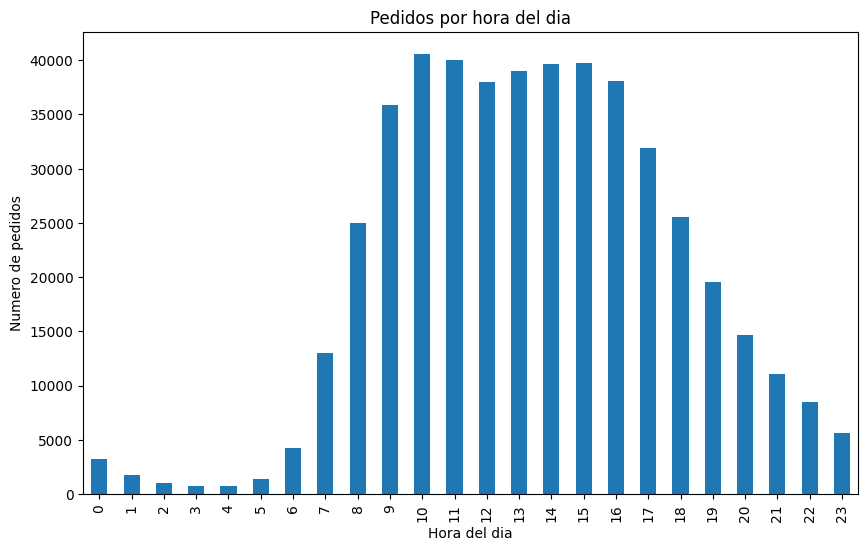

In [37]:
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()
orders_by_hour.plot(kind='bar', figsize=(10, 6), title='Pedidos por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Numero de pedidos')
plt.show()

Escribe aquí tus conclusiones

### [A3] ¿Qué día de la semana compran víveres las personas?

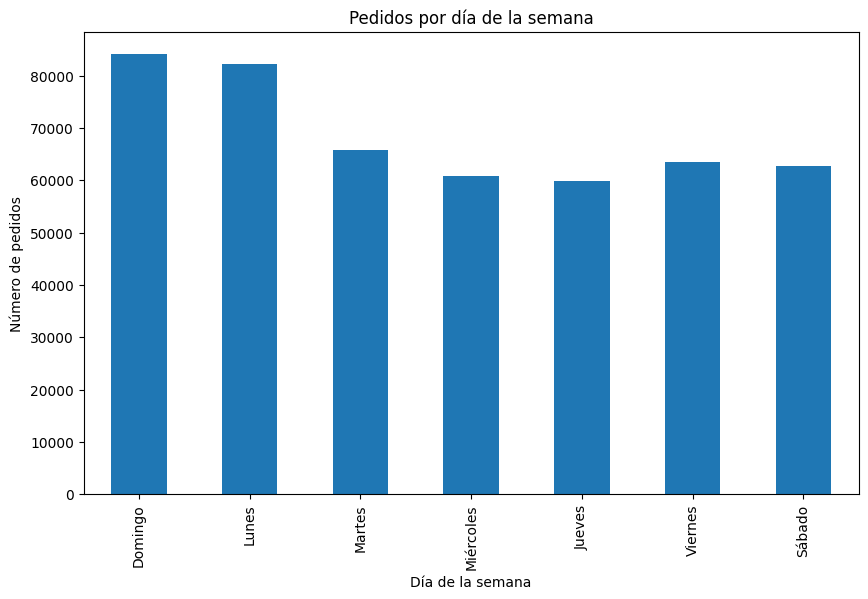

In [38]:
days_map = {0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 
           4: 'Jueves', 5: 'Viernes', 6: 'Sábado'}
orders_by_dow = orders['order_dow'].value_counts().sort_index()
orders_by_dow.index = orders_by_dow.index.map(days_map)
orders_by_dow.plot(kind='bar', figsize=(10, 6), title='Pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.show()

Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Tiempo mínimo de espera: 0.0 días
Tiempo máximo de espera: 30.0 días


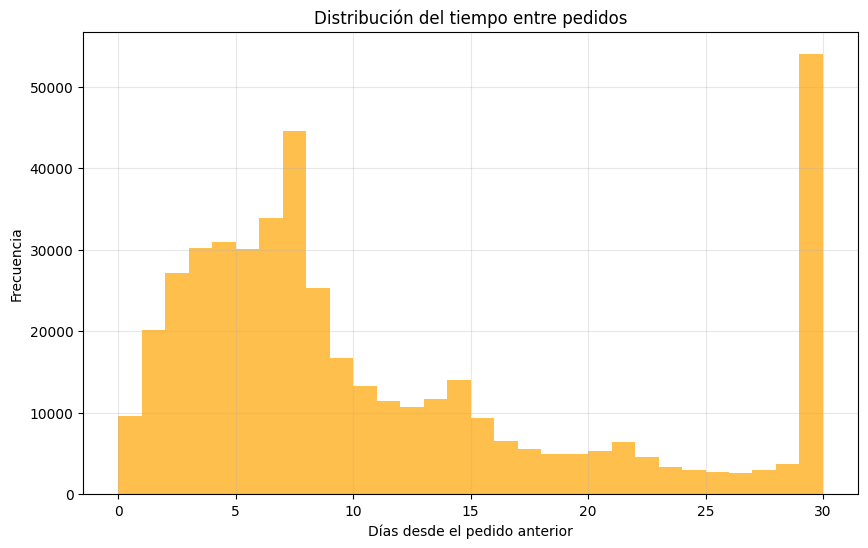

In [39]:
wait_times = orders['days_since_prior_order'].dropna()

print("Tiempo mínimo de espera:", wait_times.min(), "días")
print("Tiempo máximo de espera:", wait_times.max(), "días")

plt.figure(figsize=(10, 6))
plt.hist(wait_times, bins=30, color='orange', alpha=0.7)
plt.title('Distribución del tiempo entre pedidos')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

Escribe aquí tus conclusiones generales:

Conclusiones [A]: La mayoría de pedidos se hacen entre las 9-16 horas. Los fines de semana hay más pedidos. El tiempo entre pedidos varía de 0 a 30 días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
wed_orders = orders[orders['order_dow'] == 3]
sat_orders = orders[orders['order_dow'] == 6]

In [41]:
wed_hourly = wed_orders['order_hour_of_day'].value_counts().sort_index()
sat_hourly = sat_orders['order_hour_of_day'].value_counts().sort_index()

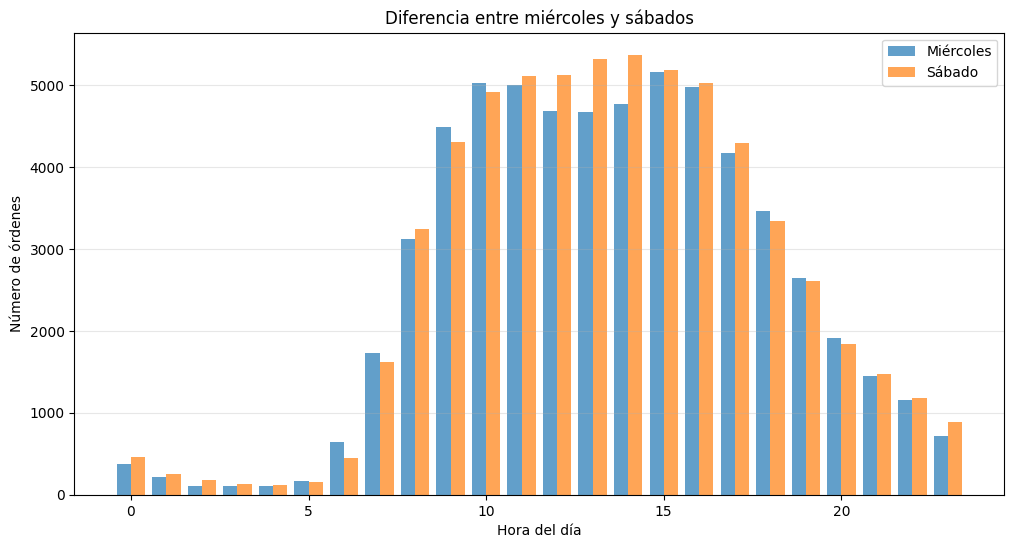

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(wed_hourly.index - 0.2, wed_hourly.values, width=0.4, alpha=0.7, label='Miércoles')
plt.bar(sat_hourly.index + 0.2, sat_hourly.values, width=0.4, alpha=0.7, label='Sábado')
plt.title('Diferencia entre miércoles y sábados')
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
orders_per_customer = orders.groupby('user_id')['order_id'].count()

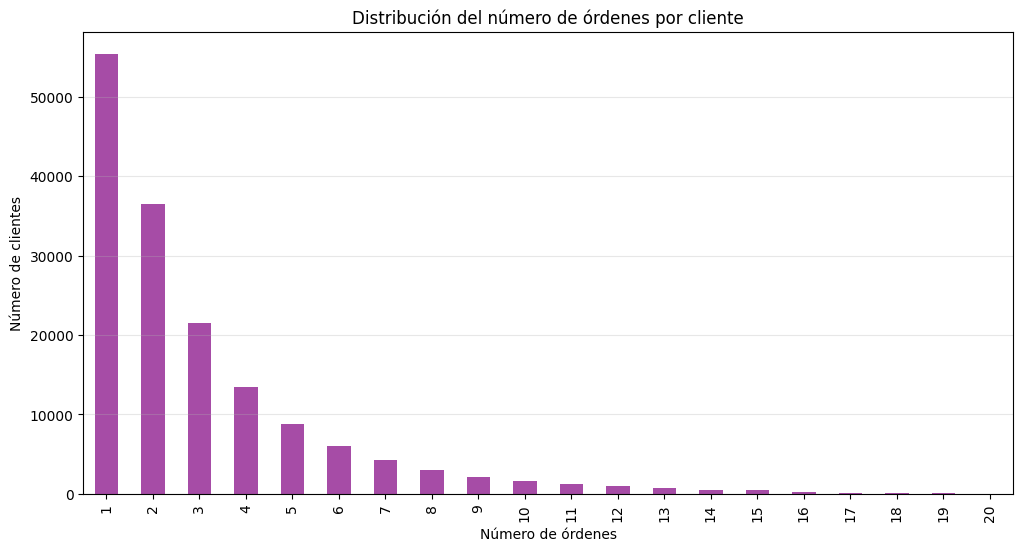

In [44]:
order_count_distribution = orders_per_customer.value_counts().sort_index()

plt.figure(figsize=(12, 6))
order_count_distribution.head(20).plot(kind='bar', color='purple', alpha=0.7)
plt.title('Distribución del número de órdenes por cliente')
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.grid(axis='y', alpha=0.3)
plt.show()

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
product_popularity = order_products.groupby('product_id')['order_id'].count().reset_index()
product_popularity = product_popularity.merge(products[['product_id', 'product_name']], on='product_id')
product_popularity = product_popularity.sort_values('order_id', ascending=False)

In [46]:
top_20_products = product_popularity.head(20)

In [47]:
print(top_20_products[['product_id', 'product_name', 'order_id']])

       product_id              product_name  order_id
22808       24852                    Banana     66050
12025       13176    Bag of Organic Bananas     53297
19370       21137      Organic Strawberries     37039
20077       21903      Organic Baby Spinach     33971
43271       47209      Organic Hass Avocado     29773
43788       47766           Organic Avocado     24689
43663       47626               Large Lemon     21495
15364       16797              Strawberries     20018
24047       26209                     Limes     19690
25556       27845        Organic Whole Milk     19600
25666       27966       Organic Raspberries     19197
21025       22935      Organic Yellow Onion     15898
22908       24964            Organic Garlic     15292
41244       45007          Organic Zucchini     14584
35996       39275       Organic Blueberries     13879
45561       49683            Cucumber Kirby     13675
25889       28204        Organic Fuji Apple     12544
5375         5876           

Escribe aquí tus conclusiones

Conclusiones [B]: Los sábados tienen más pedidos en horas de la mañana. La mayoría de clientes hacen 1-5 pedidos. Los productos más populares son bananas y frutas varias.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
items_per_order = order_products.groupby('order_id')['product_id'].count()

In [49]:
print("Artículos promedio por pedido:", items_per_order.mean())

Artículos promedio por pedido: 10.098983215049127


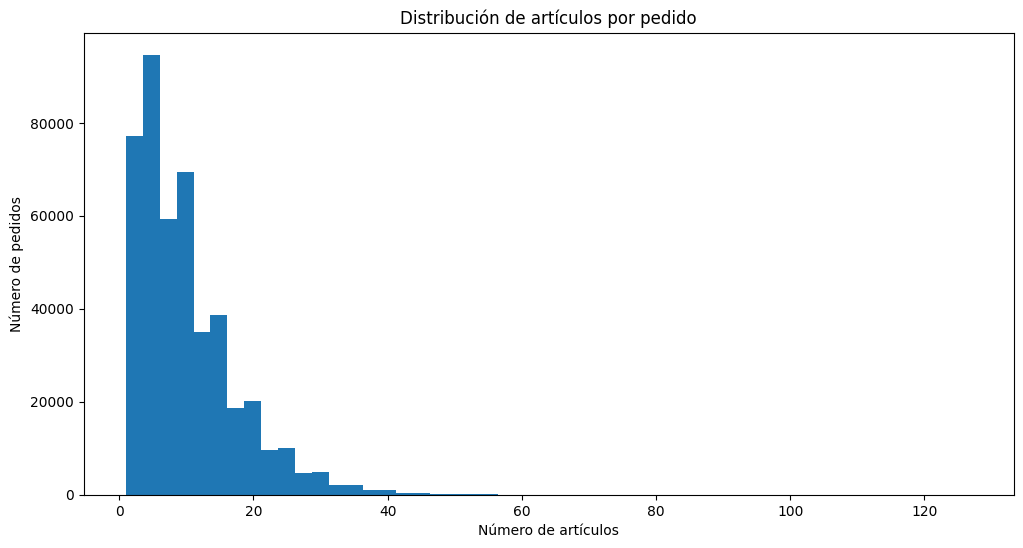

In [50]:
items_per_order.plot(kind='hist', bins=50, figsize=(12, 6))
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos')
plt.ylabel('Número de pedidos')
plt.show()


Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
reordered_products = order_products[order_products['reordered'] == 1]

In [52]:
reorder_counts = reordered_products.groupby('product_id')['reordered'].count().reset_index()
reorder_counts = reorder_counts.merge(products[['product_id', 'product_name']], on='product_id')
reorder_counts = reorder_counts.sort_values('reordered', ascending=False)

In [53]:
top_20_reordered = reorder_counts.head(20)
print(top_20_reordered[['product_id', 'product_name', 'reordered']])

       product_id              product_name  reordered
18104       24852                    Banana      55763
9528        13176    Bag of Organic Bananas      44450
15368       21137      Organic Strawberries      28639
15936       21903      Organic Baby Spinach      26233
34407       47209      Organic Hass Avocado      23629
34828       47766           Organic Avocado      18743
20285       27845        Organic Whole Milk      16251
34725       47626               Large Lemon      15044
20375       27966       Organic Raspberries      14748
12193       16797              Strawberries      13945
19088       26209                     Limes      13327
16700       22935      Organic Yellow Onion      11145
18186       24964            Organic Garlic      10411
32792       45007          Organic Zucchini      10076
36219       49683            Cucumber Kirby       9538
20543       28204        Organic Fuji Apple       8989
5978         8277  Apple Honeycrisp Organic       8836
28607     

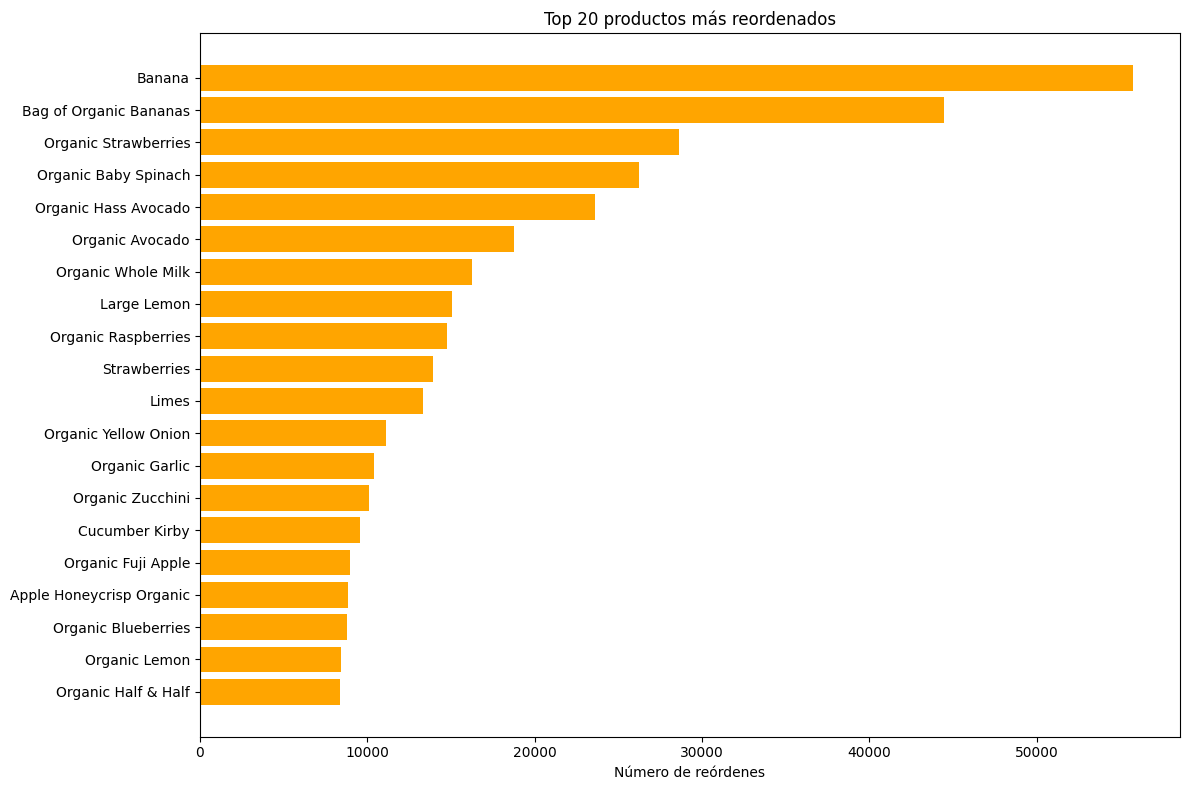

In [54]:
plt.figure(figsize=(12, 8))
plt.barh(top_20_reordered['product_name'].str[:30], top_20_reordered['reordered'], color='orange')
plt.title('Top 20 productos más reordenados')
plt.xlabel('Número de reórdenes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [68]:
reorder_rates = order_products.groupby('product_id')['reordered'].mean()
reorder_rates = reorder_rates.reset_index()


In [69]:
reorder_rates = reorder_rates.merge(products[['product_id', 'product_name']], on='product_id')

In [70]:
print()
print("Productos que se vuelven a pedir:")
print()
print(reorder_rates.sort_values('reordered', ascending=False).head(10))


Productos que se vuelven a pedir:

       product_id  reordered  \
13453       14721        1.0   
19195       20949        1.0   
6136         6723        1.0   
6144         6732        1.0   
41319       45088        1.0   
41310       45078        1.0   
19258       21016        1.0   
19248       21005        1.0   
32273       35192        1.0   
32277       35197        1.0   

                                            product_name  
13453                            Bone Strength Take Care  
19195                           Vanilla Sandwich Cookies  
6136                                    Palmiers- Petite  
6144                   Naturally Sparkling Mineral Water  
41319  California Dill Pollen & Garlic Goat Cheese & ...  
41310                                       Pomegranatea  
19258       Parchment Lined 8 in x 3.75 in x 2.5 in Pans  
19248                        Peanut Butter Pie Ice Cream  
32273                         Chocolate Soy Milk Singles  
32277  Mocha Chocolat

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [72]:
user_reorder_ratio = order_products.merge(orders[['order_id', 'user_id']], on='order_id')
user_reorder_stats = user_reorder_ratio.groupby('user_id').agg(
    total_products=('product_id', 'count'),
    reordered_products=('reordered', 'sum')
).reset_index()

user_reorder_stats['reorder_ratio'] = user_reorder_stats['reordered_products'] / user_reorder_stats['total_products']

In [73]:
print("Proporción promedio de reórdenes por cliente:", user_reorder_stats['reorder_ratio'].mean())
print("Proporción mínima de reórdenes por cliente:", user_reorder_stats['reorder_ratio'].min())
print("Proporción máxima de reórdenes por cliente:", user_reorder_stats['reorder_ratio'].max())

Proporción promedio de reórdenes por cliente: 0.4948531736151642
Proporción mínima de reórdenes por cliente: 0.0
Proporción máxima de reórdenes por cliente: 1.0


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [74]:
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

In [75]:
first_in_cart_count = first_in_cart.groupby('product_id')['order_id'].count().reset_index()
first_in_cart_count = first_in_cart_count.merge(products[['product_id', 'product_name']], on='product_id')
first_in_cart_count = first_in_cart_count.sort_values('order_id', ascending=False)

In [76]:
top_20_first_in_cart = first_in_cart_count.head(20)
print("Top 20 productos añadidos primero al carrito:")
print(top_20_first_in_cart[['product_id', 'product_name', 'order_id']])

Top 20 productos añadidos primero al carrito:
       product_id                 product_name  order_id
13414       24852                       Banana     15562
7127        13176       Bag of Organic Bananas     11026
15028       27845           Organic Whole Milk      4363
11384       21137         Organic Strawberries      3946
25439       47209         Organic Hass Avocado      3390
11786       21903         Organic Baby Spinach      3336
25732       47766              Organic Avocado      3044
10622       19660                 Spring Water      2336
9050        16797                 Strawberries      2308
15102       27966          Organic Raspberries      2024
24024       44632   Sparkling Water Grapefruit      1914
26519       49235          Organic Half & Half      1797
25658       47626                  Large Lemon      1737
115           196                         Soda      1733
20853       38689     Organic Reduced Fat Milk      1397
14158       26209                        L

Escribe aquí tus conclusiones

Conclusiones [C]: Los clientes suelen comprar alrededor de 10 artículos por pedido. Los productos reordenados son similares a los más populares. La tasa de reorden promedio es alta, lo que sugiere que los clientes repiten compras.

### Conclusion general del proyecto:

In [ ]:
Después de analizar los datos de Instacart, encontré que:

Patrones de compra: La mayoría de pedidos se realizan entre las 9 AM y 4 PM,
con mayor actividad los fines de semana.

Comportamiento del cliente: La mayoría de clientes hacen pocos pedidos,
pero hay algunos clientes muy frecuentes.

Productos populares: Frutas y productos básicos como bananas y leche son los más populares.

Vuelven a comprar: Los clientes tienden a reordenar productos,
especialmente artículos de consumo frecuente.

Proceso de compra: Los clientes suelen comenzar su carrito con productos específicos
que probablemente son los que más necesitan.

Este análisis me ayudó a entender mejor los hábitos de compra de los usuarios de Instacart
y cómo podrían optimizar su servicio basado en estos patrones.